In [4]:
import numpy as np
import pandas as pd
import os
from shutil import copyfile
import pickle
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import colorlover as cl


import neuro_morpho_toolbox as nmt
%matplotlib inline

/home/penglab/anaconda3/lib/python3.7/site-packages/neuro_morpho_toolbox-0.1-py3.7.egg/neuro_morpho_toolbox/
Loading CCF Atlas data...
Loading time: 0.78
Loading CCF brain structure data...
Loading time: 0.00


In [5]:
ns_J = nmt.neuron_set('/home/penglab/FeaCal/Janelia_1000')


Loading...
100 loaded: 3.8s
Invalid number of soma found: 0
QC failed: AA0114.swc
Invalid number of soma found: 0
QC failed: AA0115.swc


KeyboardInterrupt: 

In [6]:
import pickle
pickle_in = open("/home/penglab/FeaCal/seu_ns.pickle","rb")
[ns_seu] = pickle.load(pickle_in)

## Soma location

In [ ]:
ns_J.features['soma_features'].raw_data .to_excel('/home/penglab/FeaCal/Janelia_somaloc.xlsx')


In [26]:
ns_seu.features['soma_features'].raw_data .to_excel('/home/penglab/FeaCal/SEU_somaloc.xlsx')

## First ten regions showing up

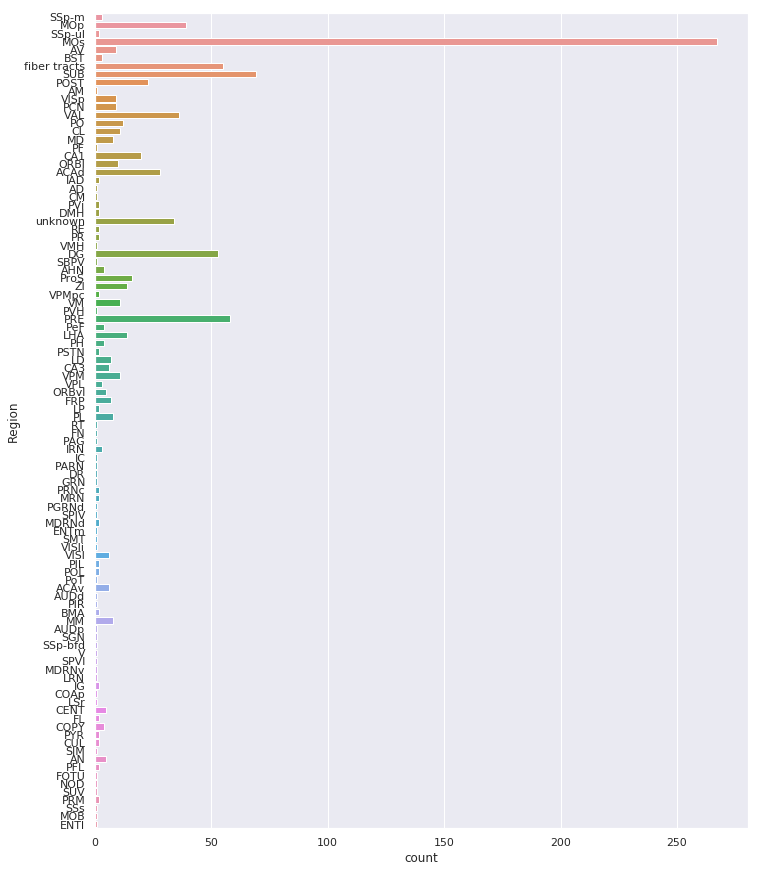

In [30]:
sf = ns_J.features['soma_features'].region
ct = sf["Region"].value_counts().sort_values(ascending=False)
thre = 0
sns.set(rc={'figure.figsize':(11.7,15)})
_ = sns.countplot(y="Region", 
                  data=sf.loc[sf.Region.isin(ct.index[ct>thre])],
                 )
pd.DataFrame(data=ct) .to_excel('/home/penglab/FeaCal/Janealia_Region_all.xlsx')
tempDF = pd.DataFrame(data=ct)
tempDF = tempDF.rename(columns={'Region': 'Count'})
ss=0
for i in range(10,tempDF.shape[0]):
    ss = ss+tempDF.iloc[i,0]
resultDF = tempDF.iloc[:10,:].copy()
resultDF.loc['others','Count'] = ss
resultDF .to_excel('/home/penglab/FeaCal/Janealia_Region_10.xlsx')

In [32]:
print('All regions of Janelia:')
print(tempDF)
print('Top ten regions of Janelia:')
resultDF

Top ten regions of Janelia:


,Count
MOs,267.0
SUB,69.0
PRE,58.0
fiber tracts,55.0
DG,53.0
MOp,39.0
VAL,36.0
unknown,34.0
ACAd,28.0
POST,23.0


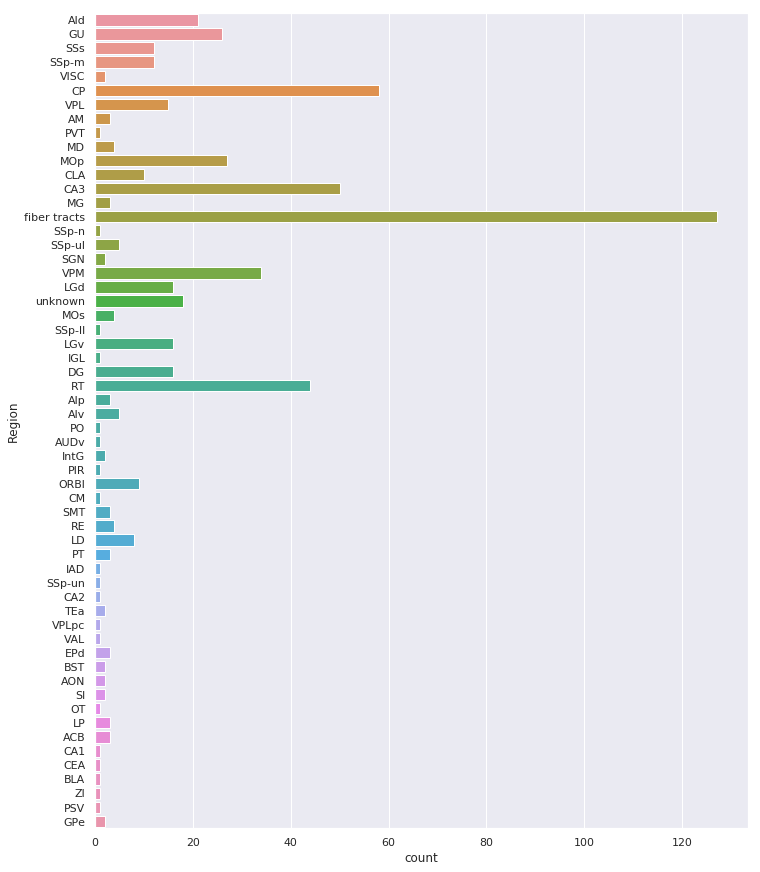

In [34]:
sf = ns_seu.features['soma_features'].region
ct = sf["Region"].value_counts().sort_values(ascending=False)
thre = 0
sns.set(rc={'figure.figsize':(11.7,15)})
_ = sns.countplot(y="Region", 
                  data=sf.loc[sf.Region.isin(ct.index[ct>thre])],
                 )
pd.DataFrame(data=ct) .to_excel('/home/penglab/FeaCal/SEU_Region_all.xlsx')
tempDF = pd.DataFrame(data=ct)
tempDF = tempDF.rename(columns={'Region': 'Count'})
ss=0
for i in range(10,tempDF.shape[0]):
    ss = ss+tempDF.iloc[i,0]
resultDF = tempDF.iloc[:10,:].copy()
resultDF.loc['others','Count'] = ss
resultDF .to_excel('/home/penglab/FeaCal/SEU_Region_10.xlsx')

print('All regions of SEU:')
print(tempDF)
print('Top ten regions of SEU:')
#resultDF

## For Janelia's data,mos and mop's layer

In [77]:
somaDF_J = ns_J.features['soma_features'].raw_data.copy()
scaled_somaDF_J = pd.DataFrame()
scaled_somaDF_J['x']=(somaDF_J['x']/nmt.annotation.space["x"]).astype(int)
scaled_somaDF_J['y']=(somaDF_J['y']/nmt.annotation.space["y"]).astype(int)
scaled_somaDF_J['z']=(somaDF_J['z']/nmt.annotation.space["z"]).astype(int)
for i in scaled_somaDF_J.index:
    scaled_somaDF_J.loc[i,'ID'] = nmt.annotation.array[scaled_somaDF_J.loc[i,'x'],scaled_somaDF_J.loc[i,'y'],scaled_somaDF_J.loc[i,'z']]
scaled_somaDF_J['ID'] = scaled_somaDF_J['ID'].astype(int)
for i in scaled_somaDF_J.index:
    scaled_somaDF_J.loc[i,'abbr']=nmt.bs.level.loc[scaled_somaDF_J.loc[i,'ID'],'Abbrevation']

In [84]:
regionlist = scaled_somaDF_J['abbr'].tolist()

In [89]:
MOp_list = []
MOs_list =[]
for i in regionlist:
    if len(i)>3:
        if i[:3]=='MOp':
            MOp_list.append(i)
        if i[:3]=='MOs':
            MOs_list.append(i)

In [101]:
typeR, typeC = np.unique(MOp_list, return_counts = True)
MopDF = pd.DataFrame(index = typeR)
MopDF['Count'] = typeC
MopDF

,Count
MOp1,4
MOp2/3,9
MOp5,17
MOp6a,9


In [100]:
typeR, typeC = np.unique(MOs_list, return_counts = True)
MOsDF = pd.DataFrame(index = typeR)
MOsDF['Count'] = typeC
MOsDF

,Count
MOs1,16
MOs2/3,46
MOs5,141
MOs6a,63
MOs6b,1


In [97]:
typeR, typeC = np.unique(regionlist , return_counts = True)
regionlistDF = pd.DataFrame(index = typeR)
regionlistDF['Count'] = typeC
regionlistDF

,Count
ACAd2/3,4
ACAd5,8
ACAd6a,16
ACAv1,1
ACAv2/3,2
ACAv5,2
ACAv6a,1
AD,1
AHN,4
AMd,1
